In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

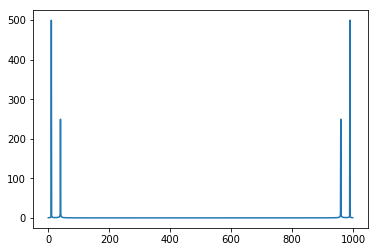

In [13]:
x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * 10 * x)
y += 0.5* np.cos(2 * np.pi * 40 * x)

fft = np.fft.fft(y)

plt.figure()
plt.plot(np.abs(fft))
plt.show()

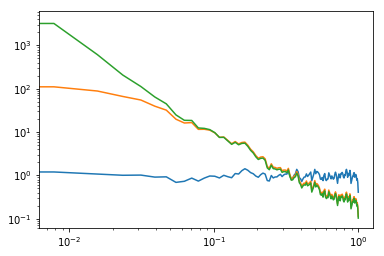

In [14]:
# Approximate convolution of dataset with lag
def approxDelayConv(data, TAU, DT):
    if TAU == 0:
        return data
    else:    
        rez = np.zeros(len(data)+1)
        for i in range(1, len(data)+1):
            rez[i] = data[i-1] + rez[i-1] * (1 - DT / TAU)

        return rez[1:]

y = np.random.normal(0, 1, 10000)
yc1 = approxDelayConv(y, 1, 1)
yc10 = approxDelayConv(y, 10, 1)
yc100 = approxDelayConv(y, 100, 1)

# plt.figure()
# plt.plot(yc1)
# plt.plot(yc10)
# plt.plot(yc100)
# plt.show()

plt.figure()
# plt.plot(np.abs(np.fft.fft(yc)))
pxx1,f1 = plt.mlab.psd(yc1)  # Power spectral density
pxx2,f2 = plt.mlab.psd(yc10)  # Power spectral density
pxx3,f3 = plt.mlab.psd(yc100)  # Power spectral density
plt.loglog(f1, pxx1)
plt.loglog(f2, pxx2)
plt.loglog(f3, pxx3)
plt.show()